In [4]:
import pandas as pd
from google.colab import drive
drive.mount('drive')

Mounted at drive


###### Прочесть с помощью Pandas файл california_housing_test.csv. Посмотреть количество строк и столбцов. Определить какой тип данных имеют столбцы

In [7]:
df = pd.read_csv('/content/drive/MyDrive/!!GeekBrains/!Разработчик/4 Python/9/california_housing_train.csv')
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [9]:
df.shape

(17000, 9)

In [10]:
df.dtypes

longitude           float64
latitude            float64
housingMedianAge      int64
totalRooms            int64
totalBedrooms         int64
population            int64
households            int64
medianIncome        float64
medianHouseValue      int64
dtype: object

###### Проверить есть ли в файле пустые значения; показать median_house_value, где medianIncome < 2; показать данные в первых двух столбцах; выбрать данные, где housing_median_age < 20 и median_house_value > 70000

In [15]:
df.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

In [28]:
df[df['medianIncome'] < 2]['medianHouseValue']

0        66900
1        80100
2        85700
4        65500
7        48500
         ...  
16984    70000
16989    58100
16990    78300
16994    76100
16998    85800
Name: medianHouseValue, Length: 2005, dtype: int64

In [35]:
df.iloc[:, :2]

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
16995,-124.26,40.58
16996,-124.27,40.69
16997,-124.30,41.84
16998,-124.30,41.80


In [19]:
df[(df['housingMedianAge'] < 20) & (df['medianHouseValue'] > 70000)]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
10,-114.60,33.62,16,3741,801,2434,824,2.6797,86500
23,-114.98,33.82,15,644,129,137,52,3.2097,71300
...,...,...,...,...,...,...,...,...,...
16976,-124.17,40.75,13,2171,339,951,353,4.8516,116100
16983,-124.19,41.78,15,3140,714,1645,640,1.6654,74600
16991,-124.23,41.75,11,3159,616,1343,479,2.4805,73200
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600


###### Определить какое максимальное и минимальное значение medianHouseValue; Показать максимальное medianHouseValue, где medianIncome = 3.1250; узнать какая максимальная population в зоне максимального значения medianHouseValue

In [21]:
df['medianHouseValue'].min(), df['medianHouseValue'].max()

(14999, 500001)

In [23]:
df[df.medianIncome == 3.1250]['medianHouseValue'].max()

380400

In [36]:
df[df.medianHouseValue == df.medianHouseValue.max()].population.max()

6897

In [38]:
import seaborn as sns

<Axes: xlabel='longitude', ylabel='medianHouseValue'>

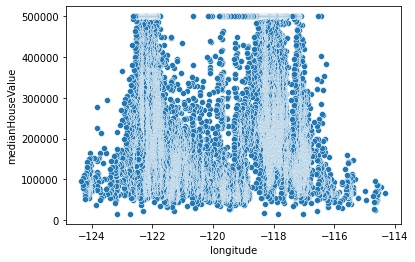

In [40]:
sns.scatterplot(df, x='longitude', y='medianHouseValue')

<Axes: xlabel='housingMedianAge', ylabel='Count'>

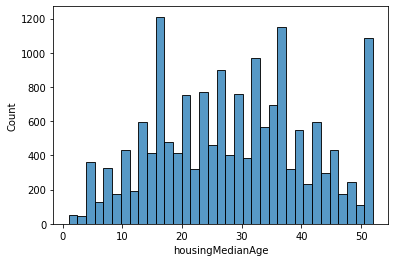

In [42]:
sns.histplot(df, x='housingMedianAge')

In [46]:
df.loc[df.housingMedianAge <= 20, 'age_group'] = 'Новые'
df.loc[df.housingMedianAge > 20, 'age_group'] = 'Старые'

<Axes: xlabel='medianHouseValue', ylabel='Count'>

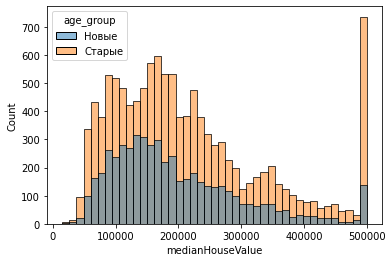

In [48]:
sns.histplot(df, x='medianHouseValue', hue = 'age_group')

<Axes: xlabel='medianHouseValue', ylabel='Count'>

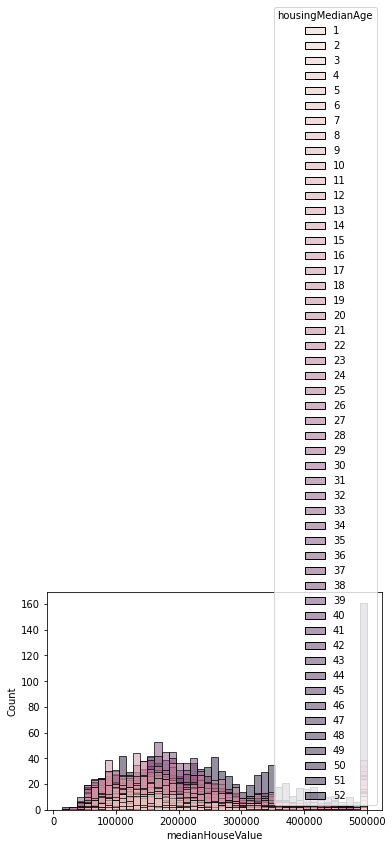

In [51]:
sns.histplot(df, x='medianHouseValue', hue='housingMedianAge')